In [ ]:
Кумакшев Феликс; ТФэ-01-21

In [2]:
import math
import numpy as np
import iapws
from iapws import IAPWS97 as gas
MPa = 10 ** 6
to_kelvin = lambda x: x + 273.15 if x else None
G = 605 
p2 = 3.8
t2 = to_kelvin(305)
d = 1.05
l_2 = 0.210
beta_2_deg = 18
n = 50
psi = 0.935
mu_2 = 0.93
point_2 = gas(P = p2, T = t2)
v_2_t = point_2.v
v_2_t
sin_beta2 = np.sin(np.radians(beta_2_deg))
cos_beta2 = np.cos(np.radians(beta_2_deg))
upper = G * v_2_t
lower = mu_2 * sin_beta2 * np.pi * d * 12
w_2_t = upper / lower
w_2_t
w_2 = w_2_t * psi
u = np.pi * d * n
c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta2) ** 0.5
loss_outlet_velocity = 0.5 * c_2 ** 2
print(f'Потери с выходной скоростью {round(loss_outlet_velocity,2)}' )

Потери с выходной скоростью 13113.26


In [ ]:
Параметры пара перед первой нерегулируемой ступенью турбины К-300-240 составляют p0=16.7 МПа, t0=520C, 
давление пара за ступенью p2=14.5 МПа, u/cф = 0.48, степень реактивности degree_of_reaction = 0.08. 
Углы выхода потока из решеток alpha1=13, beta2=beta1-5, коэффициенты скорости равны phi=0.97, psi=0.935.
Построить треугольники скоростей и определить относительный лопаточный КПД. 
Найти мощность на лопатках Poi если расход пара а G=240 кг/c.

 Проверка : (271.3150501165919 = 271.31505011659186)


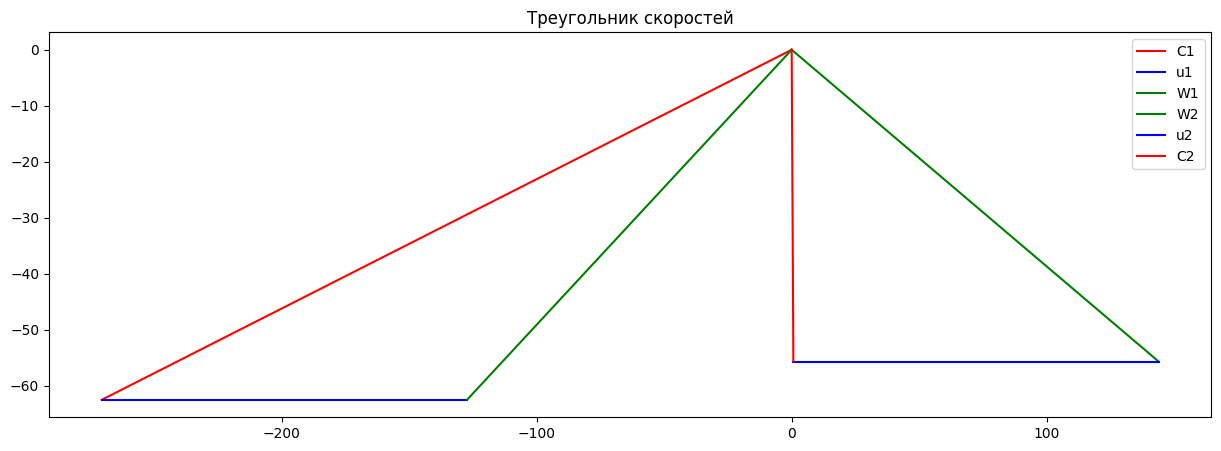

In [6]:
p0 = 16.7
t0 = to_kelvin(520)
p2 = 14.5 
degree_of_reaction = 0.08 
alpha1 = 13
delta_beta_deg = 5
fi = 0.97
psi= 0.935
mass_flow = 240 
u_cf = 0.48
sin_alpha1 = np.sin(np.radians(alpha1))
cos_alpha1 = np.cos(np.radians(alpha1))
inlet_point = gas(P= p0, T=t0)
outlet_point = gas(P= p2, s=inlet_point.s)
theoretical_heat_drop = inlet_point.h - outlet_point.h
stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reaction ) 
rotor_heat_drop = theoretical_heat_drop * degree_of_reaction
c1_t = (2 * 1000 * stator_heat_drop) ** 0.5
c_1 = c1_t * fi
stator_speed_loss = 0.5 * ((c1_t ** 2) - (c_1 ** 2))
dummy_speed = (2 * theoretical_heat_drop * 1000 ) ** 0.5
u = u_cf  * dummy_speed
sin_alpha1 = np.sin(np.radians(alpha1))
cos_alpha1 = np.cos(np.radians(alpha1))
w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha1) ** 0.5
w2_t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
w_2 = w2_t * psi
beta1 = np.arccos((c_1 ** 2 + w_1 ** 2 - u**2)/(2 * c_1 * w_1)) + np.radians(alpha1) #По теореме косинусов
beta1_deg = np.degrees(beta1)
beta2_deg = beta1_deg - delta_beta_deg
beta2 = np.radians(beta2_deg)
sin_beta_2 = np.sin(np.radians(beta2_deg))
cos_beta_2 = np.cos(np.radians(beta2_deg))
c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5
alpha2 = np.arccos((c_2 ** 2 + w_2 ** 2 - u ** 2) /(2 * c_2 * w_2)) + beta2
alpha2_deg  = np.degrees(alpha2)
absolute_projection = c_1 * cos_alpha1 + c_2 * np.cos(alpha2)
relative_projection =  w_1 * np.cos(beta1) + w_2 * cos_beta_2
print(f' Проверка : ({absolute_projection} = {relative_projection})')
c1_plot = [[0, -c_1 * cos_alpha1], [0, -c_1 * sin_alpha1]]
u1_plot = [[-c_1 * cos_alpha1, -c_1 * cos_alpha1 + u], [-c_1 * sin_alpha1, -c_1 * sin_alpha1]]
w1_plot = [[0, -c_1 * cos_alpha1 + u], [0, -c_1 * sin_alpha1]]
w2_plot = [[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]]
u2_plot = [[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]]
c2_plot = [[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]]
import matplotlib.pyplot as plt
fig, ax  = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(c1_plot[0], c1_plot[1], label='C1', c='red')
ax.plot(u1_plot[0], u1_plot[1], label='u1', c='blue')
ax.plot(w1_plot[0], w1_plot[1], label='W1', c='green')
ax.plot(w2_plot[0], w2_plot[1], label='W2', c='green')
ax.plot(u2_plot[0], u2_plot[1], label='u2', c='blue')
ax.plot(c2_plot[0], c2_plot[1], label='C2', c='red')
ax.set_title("Треугольник скоростей")
ax.legend();